# Análise do IBGE

## Introdução

O Instituto Brasileiro de Geografia e Estatística ([IBGE](https://www.ibge.gov.br/)) é um instituto público da administração federal brasileira criado em 1934 e instalado em 1936 com o nome de Instituto Nacional de Estatística; seu fundador e grande incentivador foi o estatístico Mário Augusto Teixeira de Freitas. O nome atual data de 1938. A sede do IBGE está localizada na cidade do Rio de Janeiro.

O IBGE tem atribuições ligadas às geociências e estatísticas sociais, demográficas e econômicas, o que inclui realizar censos e organizar as informações obtidas nesses censos, para suprir órgãos das esferas governamentais federal, estadual e municipal, e para outras instituições e o público em geral.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Verificação e análise inicial dos dados;
* 2ª Etapa: Respostas das perguntas.

## Objeto de análise:


## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacionadas;
* Encotrar padrões para os valores da resistência do concreto à compressão
* Encontrar o melhor modelo preditivo;

## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

Attribute Information
* Cimento : medido em $kg/m^{3}$
* Escória: medido em $kg/m^{3}$
* Cinza volante : medido em $kg/m^{3}$
* Água : medido em $kg/m^{3}$
* Super plastificante : medido em $kg/m^{3}$
* Agregado graúdo : medido em $kg/m^{3}$
* Agregado miúdo : medido em $kg/m^{3}$
* Idade : medido em dias (1~365)
* Resistência da compressão do concreto: medido em $MPa$


**FONTE:**
* https://www.kaggle.com/vinayakshanawad/cement-manufacturing-concrete-dataset
* https://www.kaggle.com/fahadmehfoooz/santader-customer-transaction-classification
*


**LIMITAÇÕES DA ANÁLISE:**
* O dataset não informa o valor do $f_{ck}$ do cimento utilizado.
* O valor do $f_{ck}$ do cimento é a variável mais importante na hora do dimensionamento do concreto, por isso, provavelmente, os modelos regressivos não serão eficientes.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

## Importações iniciais

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

# configurações
import warnings
warnings.filterwarnings('ignore')

In [6]:
ibge = pd.read_csv('dados.csv')

## Otimizando os dados

In [5]:
ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


(array([1.200e+01, 1.990e+02, 1.875e+03, 9.077e+03, 2.136e+04, 2.503e+04,
        1.447e+04, 4.203e+03, 5.700e+02, 4.400e+01]),
 array([1.33924461, 1.40816983, 1.47709504, 1.54602026, 1.61494547,
        1.68387069, 1.7527959 , 1.82172112, 1.89064633, 1.95957155,
        2.02849676]),
 <BarContainer object of 10 artists>)

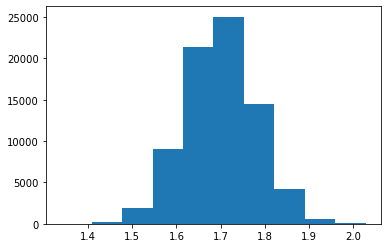

In [14]:
plt.hist(ibge.Altura)

In [17]:
ibge.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

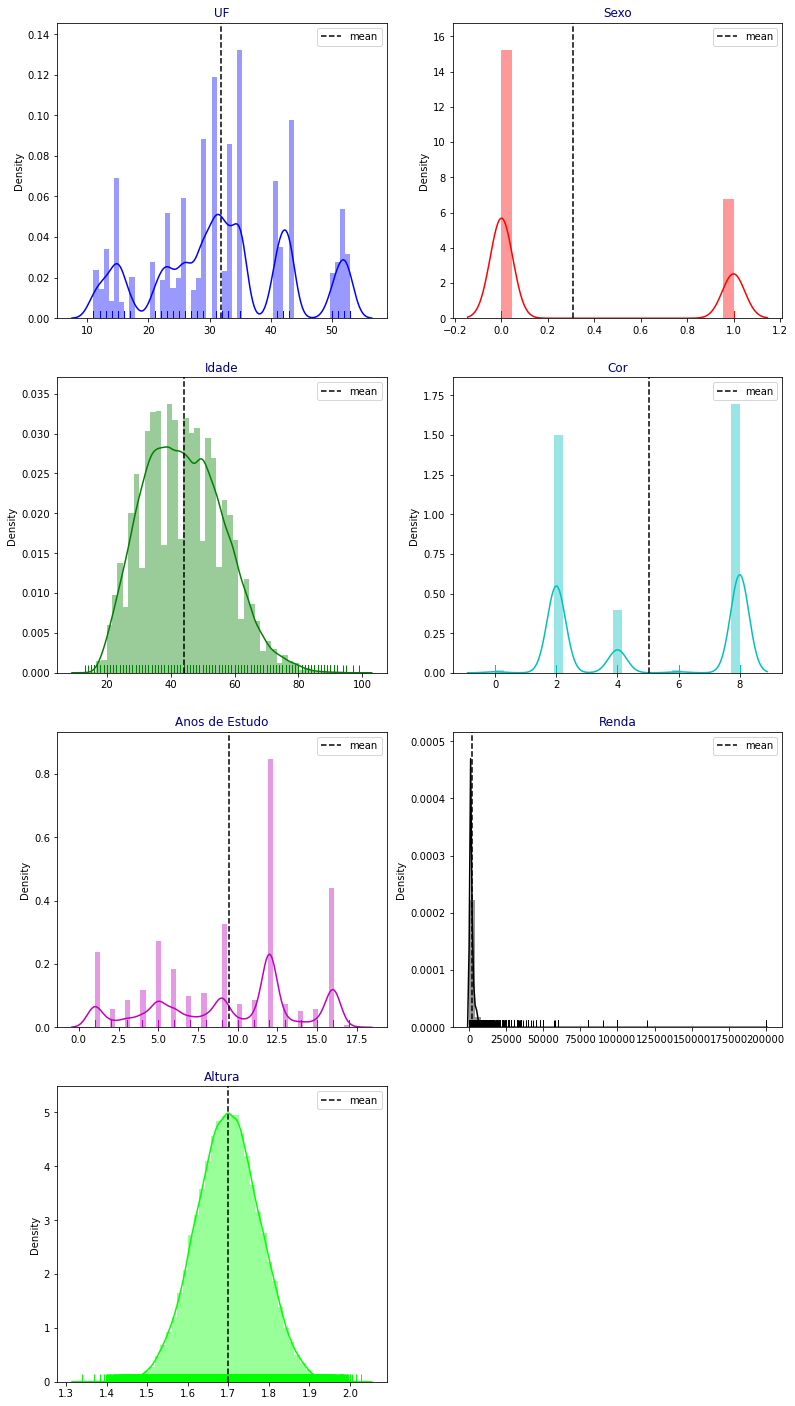

In [22]:
cols = [i for i in ibge.columns]
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime"]
fig = plt.figure(figsize=(13, 25))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(4, 2, j+1)
    ax = sns.distplot(ibge[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(ibge[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")